In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1024 		 0.1 		 0.1 |
| 1070 		 0.1 		 0.1 |
| 1091 		 0.1 		 0.1 |
| 1081 		 0.1 		 0.1 |
| 1029 		 0.1 		 0.1 |
| 1024 		 0.1 		 0.1 |
| 1104 		 0.1 		 0.1 |
| 1099 		 0.1 		 0.1 |
| 1049 		 0.1 		 0.1 |
| 1031 		 0.1 		 0.1 |
| 1116 		 0.1 		 0.1 |
| 1036 		 0.1 		 0.1 |
| 1005 		 0.1 		 0.1 |
| 1066 		 0.1 		 0.1 |
| 1054 		 0.1 		 0.1 |
| 1067 		 0.1 		 0.1 |
| 1006 		 0.1 		 0.1 |
| 1009 		 0.1 		 0.1 |
| 1104 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 105.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1091
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


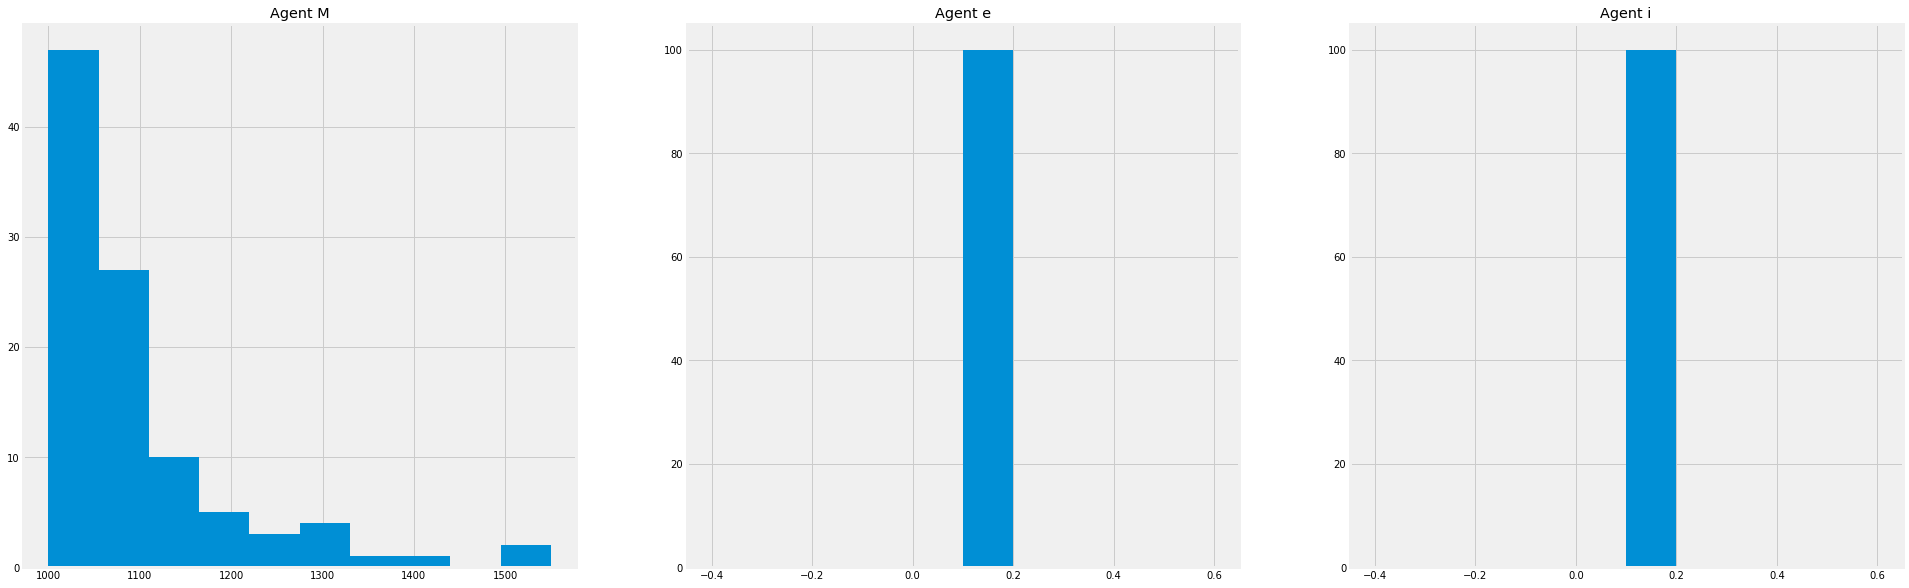

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 96.0, Temptation: 107.0, Sucker: -11.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 92.0, Temptation: 102.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 98.0, Temptation: 109.0, Sucker: -11.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 92.0, Temptation: 102.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 97.0, Temptation: 108.0, Sucker: -11.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 92.0, Temptation: 102.0, Su

In [2]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = ["power",1000, 10]
E = [0.1, 1/10000]
I = [0.1, 1/10000]
power_distance = [M,E,I]

agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 25 minutes.
    S.D.  Counts  Seed
0    0.5     280  1024
1    0.6     251  1024
2    0.7     250  1024
3    0.8     207  1024
4    0.9     183  1024
5    1.0     187  1024
6    1.1     174  1024
7    1.2     152  1024
8    1.3     142  1024
9    1.4     116  1024
10   1.5      97  1024
11   1.6      83  1024
12   1.7      75  1024
13   1.8      63  1024
14   1.9      63  1024
15   2.0      47  1024
16   2.1      32  1024
17   2.2      18  1024
18   2.3      12  1024
19   2.4       6  1024
20   2.5       0  1024
21   2.6       0  1024
22   2.7       0  1024
23   2.8       0  1024
24   2.9       0  1024
25   3.0       0  1024


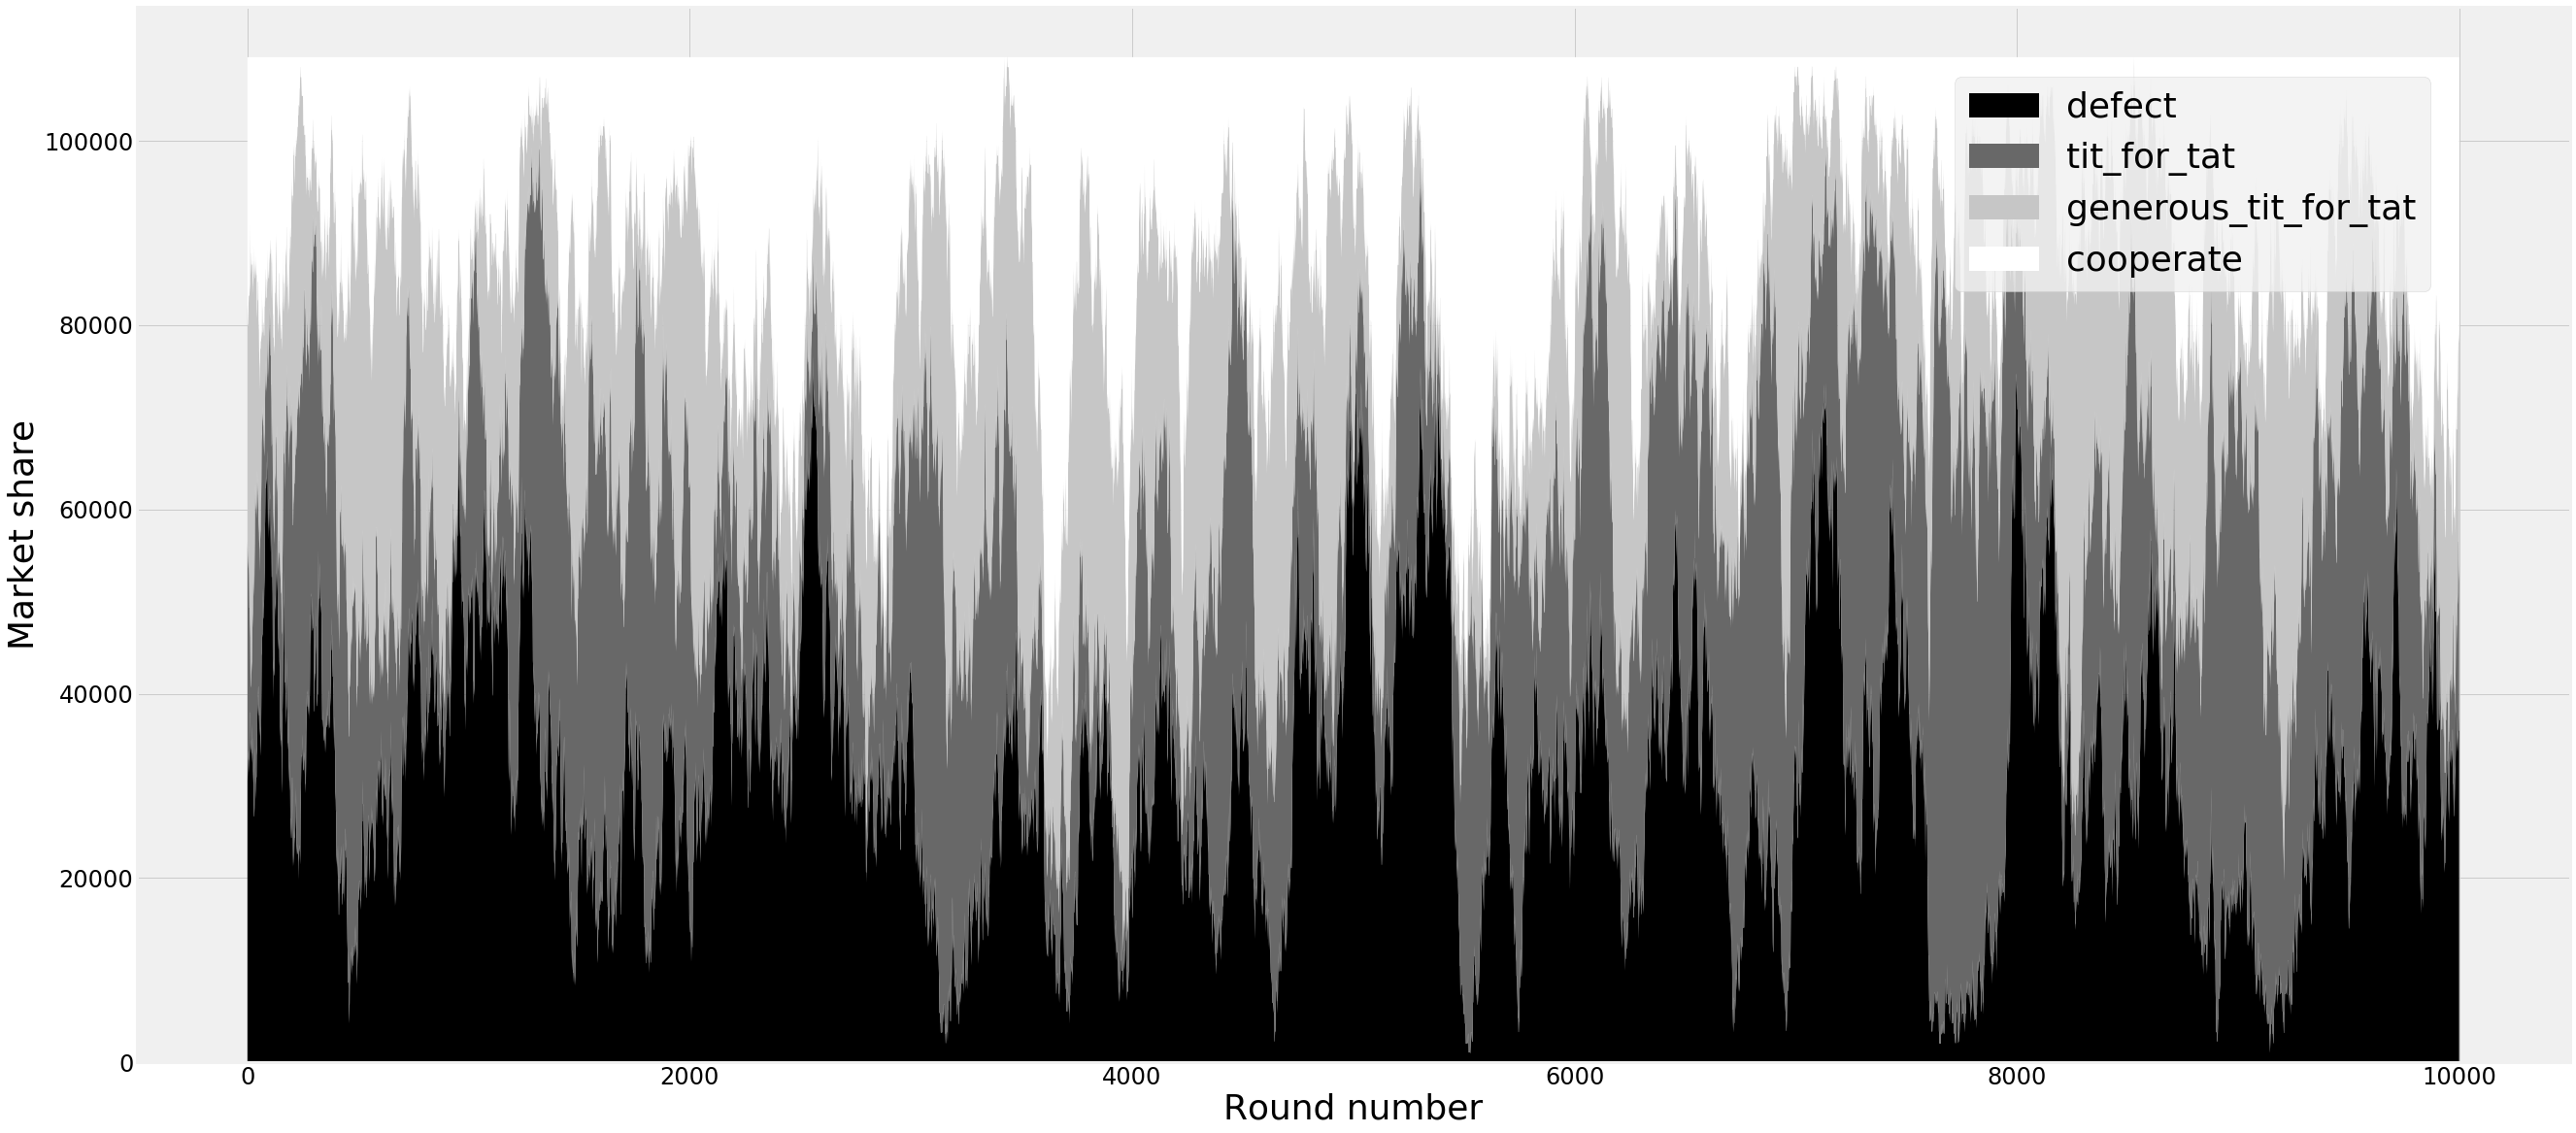

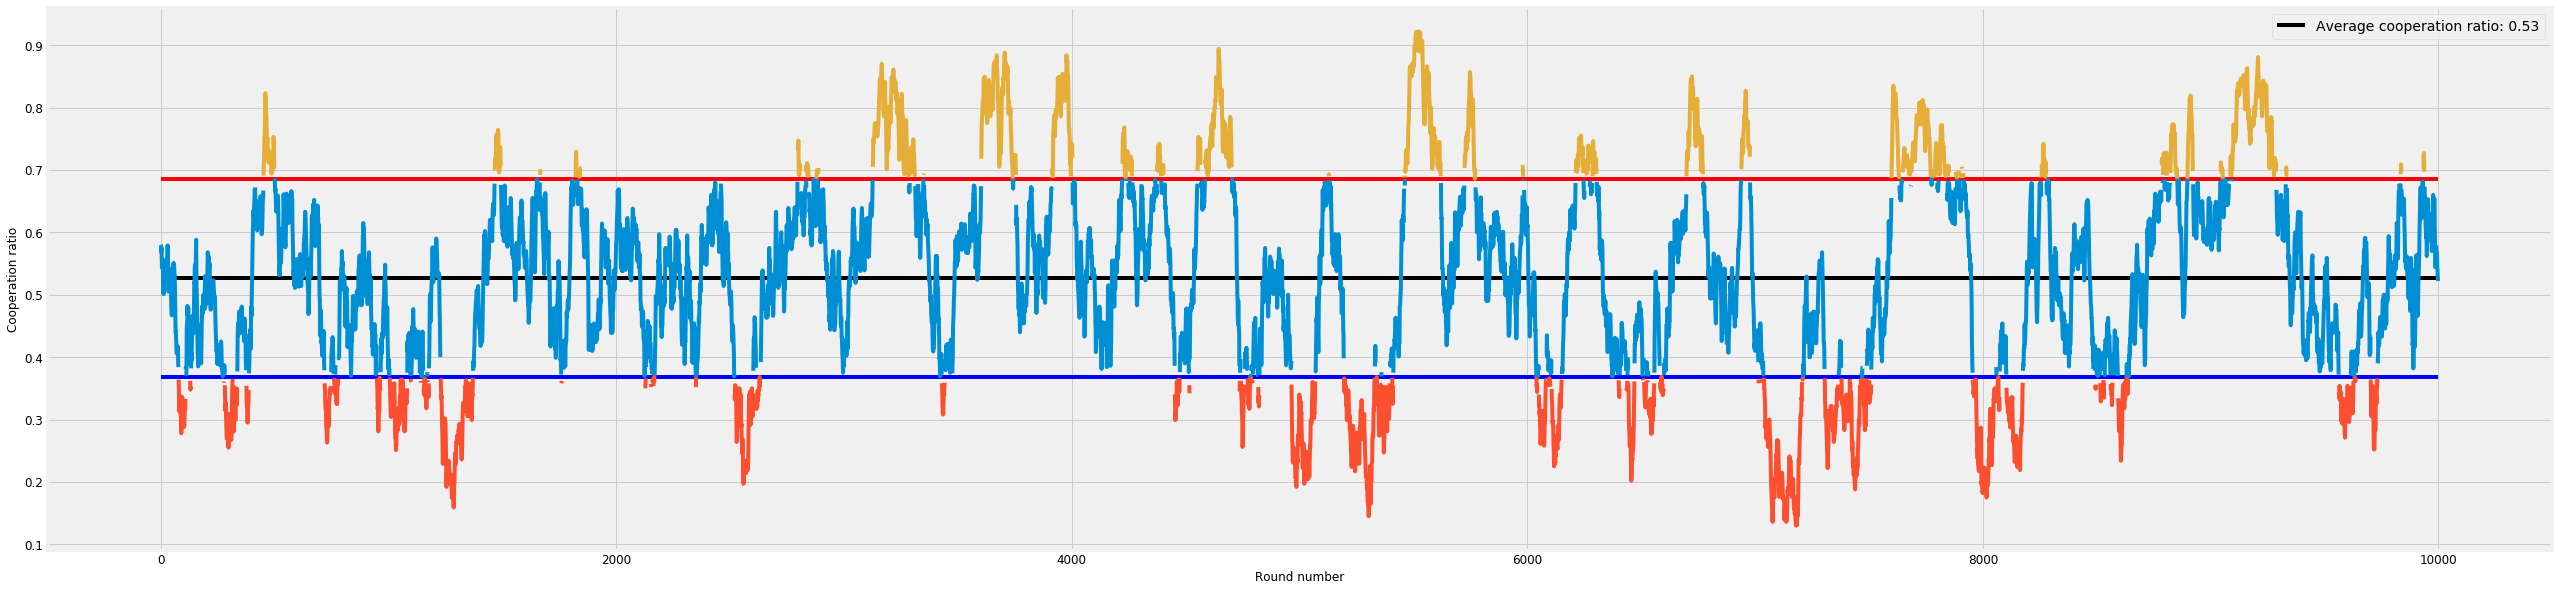

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_power_law_M", seed = str(seed))